#### Задание VIII.11.3

Рассмотрим алгоритм Рунге-Кутты третьего порядка для вычисления фазовых таректорий для системы 
\begin{equation*}
 \begin{cases}
   x' = y\\
   y' = x^2 - 1
 \end{cases}
\end{equation*}

$$f_1 = f (x_n, y_n)$$

$$f_2 = f (x_n + \frac{2}{3}h, y_n+ \frac{2}{3}h f_1)$$

$$f_3 = f (x_n + \frac{2}{3}h, y_n - \frac{1}{3}h f_1 + hf_2)$$

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, vec):
  res = np.zeros(2);
  res[0] = vec[1]
  res[1] = vec[0] * vec[0] - 1
  return res

def RK_Step (f, t, vec ,h):
  res = np.zeros(2)
  k1 = f (t, vec)
  k2 = f (t + 2/3 * h, vec + 2/3 * k1 * h)
  k3 = f (t + 2/3 * h, vec - 1/3 * k1 * h + 1 * k2 * h)
  return vec + (k1 + 2 * k2 + k3) * h / 4


def Runge_Kutta (x0,y0, h, begin, end):
  current = [x0,y0]

  x = []
  y = []

  x.append(x0)
  y.append(y0)

  t = begin
  while (t < end):
    current = RK_Step(f, t, current, h)
    x.append(current[0])
    y.append(current[1])
    t = t + h  

  label = "dot(" + str(round(x0, 2)) + "," + str(round(y0,2)) + ")"
  plt.plot(x,y,".",label=label)

  return x,y


/tmp/ipykernel_44664/1507538745.py:7: RuntimeWarning: overflow encountered in double_scalars
  res[1] = vec[0] * vec[0] - 1
/tmp/ipykernel_44664/1507538745.py:14: RuntimeWarning: invalid value encountered in subtract
  k3 = f (t + 2/3 * h, vec - 1/3 * k1 * h + 1 * k2 * h)
/tmp/ipykernel_44664/1507538745.py:14: RuntimeWarning: invalid value encountered in add
  k3 = f (t + 2/3 * h, vec - 1/3 * k1 * h + 1 * k2 * h)


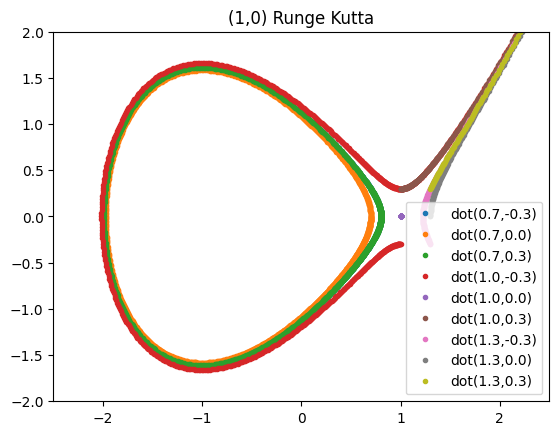

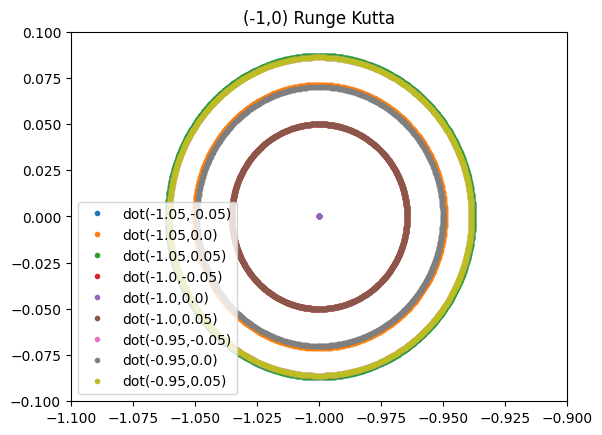

In [38]:
dx = 0
dy = 0
while (dx < 0.7):
  dy = 0
  while (dy < 0.7):
    Runge_Kutta (1 - 0.3 + dx,0 - 0.3 + dy ,0.01,0,10)
    dy += 0.3
  dx += 0.3

plt.xlim(left=-2.5,right=2.5)
plt.ylim(bottom=-2,top=2)
plt.title("(1,0) Runge Kutta")
plt.legend()
plt.show()

dx = 0
dy = 0
while (dx < 0.15):
  dy = 0
  while (dy < 0.15):
    Runge_Kutta (-1 - 0.05 + dx,0 - 0.05 + dy ,0.01,0,10)
    dy += 0.05
  dx += 0.05

plt.xlim(left=-1.1,right=-0.9)
plt.ylim(bottom=-0.1,top=0.1)
plt.title("(-1,0) Runge Kutta")
plt.legend()
plt.show()

Далее посчитаем траектории, используя метод Адамса третьего порядка.

$$\Delta x,y = \frac{23k_1 - 16k_2 + 5k_3}{12}$$

$$y_{n+1} = y_n + \Delta y$$
$$x_{n+1} = x_n + \Delta x$$

In [39]:
def st_adams (f, t, vec3, h):
  k3 = f(t, vec3[0])
  k2 = f(t, vec3[1])
  k1 = f(t, vec3[2])

  return (23*k1-16*k2+5*k3)*h/12  

def Adams (x3, y3, h, begin, end):

  x = [x3[0], x3[1], x3[2]]
  y = [y3[0], y3[1], y3[2]]

  t = begin

  current = [[x3[0], y3[0]],[x3[1], y3[1]],[x3[2], y3[2]]]
  while (t < end):
    delta = st_adams (f, t, current, h)
    t = t + h
    current[0] = current[1]
    current[1] = current[2]
    current[2] = current[2] + delta
    x.append(current[2][0])
    y.append(current[2][1])

  label = "dot(" + str(round(x3[0], 2)) + "," + str(round(y3[0],2)) + ")"
  plt.plot(x,y,".",label=label)


/tmp/ipykernel_44664/1507538745.py:7: RuntimeWarning: overflow encountered in double_scalars
  res[1] = vec[0] * vec[0] - 1
/tmp/ipykernel_44664/3906134419.py:6: RuntimeWarning: invalid value encountered in subtract
  return (23*k1-16*k2+5*k3)*h/12


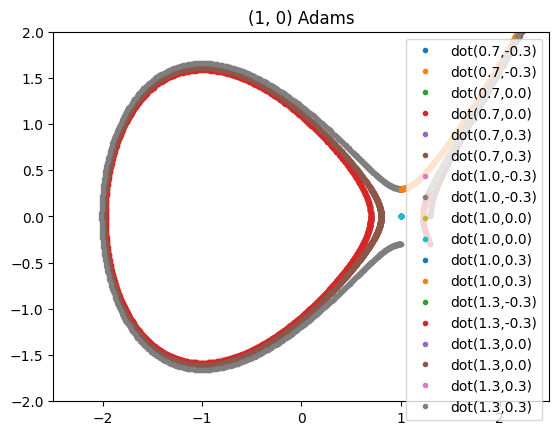

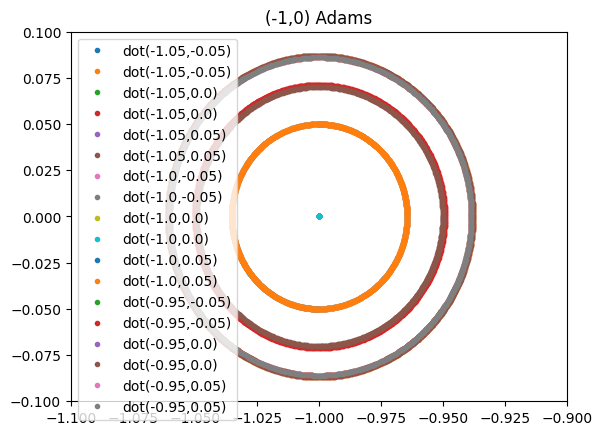

In [40]:
dx = 0
dy = 0
while (dx < 0.7):
  dy = 0
  while (dy < 0.7):
    x3,y3 = Runge_Kutta (1 - 0.3 + dx,0 - 0.3 + dy ,0.01,0,0.03)
    Adams (x3,y3,0.01,0.03,10)
    dy += 0.3
  dx += 0.3

plt.xlim(left=-2.5,right=2.5)
plt.ylim(bottom=-2,top=2)
plt.title("(1, 0) Adams")
plt.legend()
plt.show()

dx = 0
dy = 0
while (dx < 0.15):
  dy = 0
  while (dy < 0.15):
    x3,y3 = Runge_Kutta (-1 - 0.05 + dx,0 - 0.05 + dy ,0.01,0,0.03)
    Adams (x3,y3,0.01,0.03,10)
    dy += 0.05
  dx += 0.05

plt.xlim(left=-1.1,right=-0.9)
plt.ylim(bottom=-0.1,top=0.1)
plt.title("(-1,0) Adams")
plt.legend()
plt.show()